## **Haberman's Survival: Exploratory Data Analysis**




**Data Description** The Haberman's survival dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


**Attribute Information:**

1.   Age of patient at time of operation (numerical)
2.   Patient's year of operation (year - 1900, numerical)
3.   Number of positive axillary nodes detected (numerical)
4.   Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

####Ref: https://www.kaggle.com/datasets/gilsousa/habermans-survival-data-set

### Objective: to classify the Survival status of a New Patient Based on the given Features

### **01- What are Axillary Lymph Nodes?**

The lymph nodes in the armpits are called axillary lymph nodes. Axillary lymph nodes are located near the breasts. This means ***they are often the first location to which breast cancer spreads*** if it moves beyond the breast tissue. There are three surgical levels of axillary lymph nodes.

The number of axillary lymph nodes can vary from person to person. Typically, a person has ***20 to 30 axillary lymph nodes***.

https://i.imgur.com/1eO2tBA.png
https://i.imgur.com/tlh9Fhd.png

**What is Survival rate?**

Survival rate is a part of survival analysis. It is the percentage of people in a study or treatment group still alive for a given period of time after diagnosis.

**Survival rate in Haberman's Dataset**

So in this dataset ,whenever an analysis is performed, Survival rate indicates percentage of patients with survival status value being 1.



### **02- Dataset description**

**Dataset contains details of 305 patients. There are 4 attributes including the class attribute.**

**Attribute Description :**

1.Age of patient at time of operation (numerical)
2.Patient's year of operation (year - 1900, numerical)
3.Number of positive axillary nodes detected (numerical)
4.Survival status (class attribute)
    * Status is marked 1 if patient survived 5 years or longer.
    * Status is marked 2 if patient died within 5 years.




### **03- Objective**

*   To thoroughly explore the data and the metadata.
Analyze all attributes available in the dataset and quantify Survival rate.
*   Document the observations seen in the graphical evidence.
*   To predict whether the patient will survive after 5 years or not based upon the patient's age, year of treatment and the number of positive lymph nodes



    


### **Environment Configuration**

In [ ]:
# check for the input dataset
#import os
#print(os.listdir('../input)) #if you give the load set path directory from local machine

#!wget https://github.com/jbrownlee/Datasets/blob/master/haberman.csv
#haberman = pd.read_csv('haberman.csv')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
## load the dataset
# read the csv File store into the variable

Haberman = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AAIC_Assignments/solving/4_Exploratory Data Analysis on Haberman Dataset/haberman.csv')
#Haberman = pd.read_csv('../HabermanSurvivalDataSet/haberman.csv')

### **Data Preparation**

 how many data-points and features?

In [ ]:
print(Haberman.shape)

(305, 4)


 What are the column names in our dataset?

In [ ]:
print(Haberman.columns)


Index(['30', '64', '1', '1.1'], dtype='object')


In [ ]:
Haberman.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [ ]:
#Since the coloumn values are numerical, I change it into other string (name) values which easy to compute

Haberman.columns = ['age', 'operation_year','nodes', 'survival_status']
Haberman.head()

,age,operation_year,nodes,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


**observations:**

* From above dataset, we have four features(variables) - [age, operation_year, nodes, survival_status].

*   age, operation_year,nodes are  Independent variables.
*   survival_status is Dependent variable (class label).

*   There are no missing values in this dataset. So there is no need to do data imputation.












In [ ]:
print('shape of the given set: {}'.format(Haberman.shape))
print('size of the Dataset: {}'.format(Haberman.size))

shape of the given set: (305, 4)
size of the Dataset: 1220


In [ ]:
Haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              305 non-null    int64
 1   operation_year   305 non-null    int64
 2   nodes            305 non-null    int64
 3   survival_status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


**observations:**
* There is no null values in the given data.

In [ ]:
Haberman.groupby(['survival_status']).count()

,age,operation_year,nodes
survival_status,,,
1,224,224,224
2,81,81,81


In [ ]:
Haberman.survival_status.value_counts()

1    224
2     81
Name: survival_status, dtype: int64

In [ ]:
Haberman.describe()

,age,operation_year,nodes,survival_status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


**Observations:**
* 50% patients  lie in between the age of (44,61)

* 95% patients  lie in between the age of (32,72)

* There are a few Outlier in node dataset.

* 50% dataset have number of nodes lie between (0,4) who age lie between (44,61) 

* 73 % patinets are lived less than 5 years


In [ ]:
Haberman['survival_status'].value_counts()

1    224
2     81
Name: survival_status, dtype: int64

observations:
* Dataset is Imbalanced-datasets, becoz data is distrubuted as 73% in status'1' and 26% in status'2'

# **Bivariate Analysis**


Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them

# **Scatter Plot**
A scatter plot is a useful visual representation of the relationship between two numerical variables (attributes) and is usually drawn before working out a linear correlation or fitting a regression line. The resulting pattern indicates the type (linear or non-linear) and strength of the relationship between two variables.

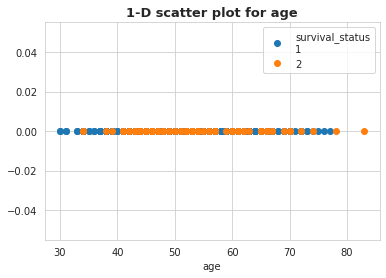

In [ ]:
#1-d scatter plot

Haberman_1 = Haberman.loc[Haberman["survival_status"] == 1]
Haberman_2 = Haberman.loc[Haberman["survival_status"] == 2]

#print(Haberman_1["age"]) 

plt.plot(Haberman_1["age"], np.zeros_like(Haberman_1['age']), 'o', label = "survival_status\n" "1")
plt.plot(Haberman_2["age"], np.zeros_like(Haberman_2['age']), 'o', label = "2")

plt.title("1-D scatter plot for age", weight = 'bold', size = 13)
plt.xlabel("age")

plt.legend()

plt.show()

observations:

*   We can easily count the number of points in the age range who survived or did not by looking at this plot.
*  Many patients between the ages of 41 and 70 died.



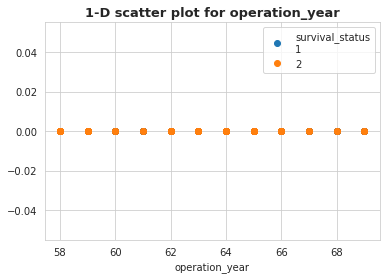

In [ ]:
#1-d scatter plot for operation year

plt.plot(Haberman_1["operation_year"], np.zeros_like(Haberman_1['operation_year']), 'o',label = "survival_status\n" "1")
plt.plot(Haberman_2["operation_year"], np.zeros_like(Haberman_2['operation_year']), 'o',label = "2")

plt.title("1-D scatter plot for operation_year", weight = 'bold', size = 13)
plt.xlabel("operation_year")
plt.legend()
plt.show()

**observations:**

*  From above plot, we didn't predict any observation



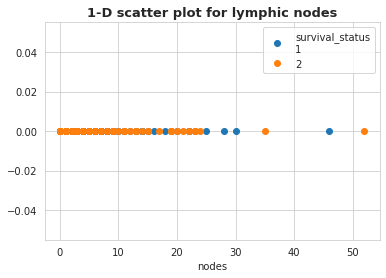

In [ ]:
#1-d scatter plot for auxiallry lymphic nodes

plt.plot(Haberman_1["nodes"], np.zeros_like(Haberman_1['nodes']), 'o',label = "survival_status\n" "1")
plt.plot(Haberman_2["nodes"], np.zeros_like(Haberman_2['nodes']), 'o',label = "2")

plt.title("1-D scatter plot for lymphic nodes", weight = 'bold', size = 13)
plt.xlabel("nodes")
plt.legend()

plt.show()

**Observation:**

*   After looking at this plot we can easily count number of points that are there in nodes range who survived or not.
*   Many patients died who auxially lymphic ndoes was between (0,25)
* From above plot, We can apply 'if-else' condition to classify the model based on #nodes. eg: 0<= node <=25 belong to Survival status = 2 (dead)


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


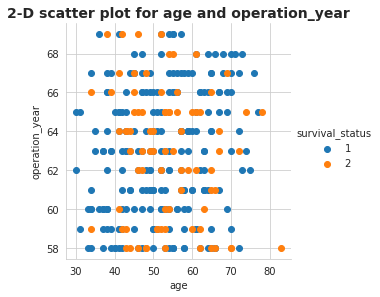

In [ ]:
#2d scatter plot with color coding for each class

sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "operation_year") \
   .add_legend()

plt.title("2-D scatter plot for age and operation_year", size = 14, weight = 'bold')
plt.show()

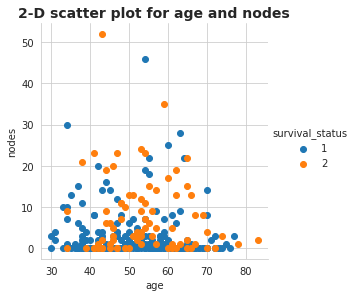

In [ ]:
# 2d scatter plot 

sns.set_style("whitegrid");
sns.FacetGrid(Haberman, hue="survival_status", size=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend()

plt.title("2-D scatter plot for age and nodes", size = 14, weight = 'bold')
plt.show()

**observations:**


*   From above 2D scatter plot, class label (i.e., a patient died or survived) is not linealry seperable 
*   We can see that the patients both survived and died in the range of (0,5) lymph nodes. But, The died ratio is less than survive ratio




# **Pair plot**

Pair plot in seaborn plots the scatter plot between every two data columns in a given dataframe.
It is used to visualize the relationship between two variables


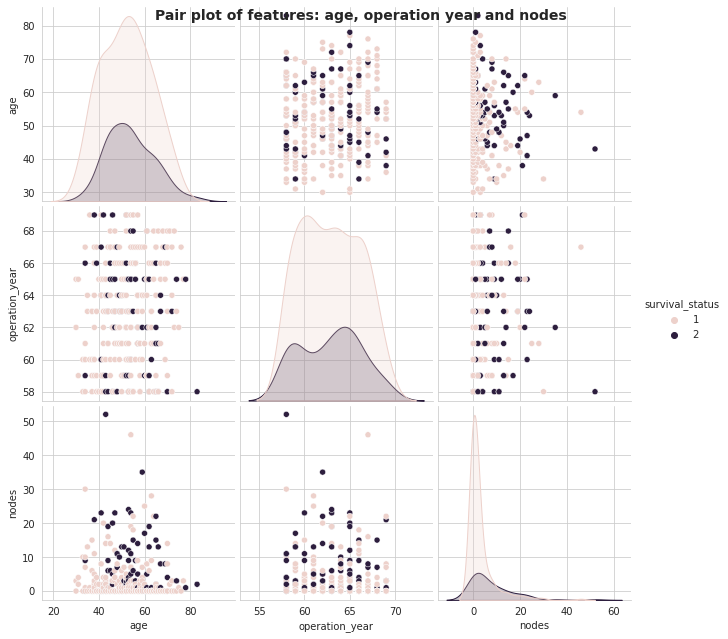

In [ ]:
#Here, we are generating pairplot based on survival_status
#We use pair plot where the dimenstionality of data is less.
#In our case we have only 4 dimension data. So, we can use pairplot.

sns.set_style("whitegrid")
sns.pairplot(Haberman, hue="survival_status", size=3)

plt.suptitle("Pair plot of features: age, operation year and nodes", weight='bold', size = 14)
plt.show()

**Observations**



*   As we are unable to classify which is the most useful feature because of too much overlapping.
*   Because of this, the plot in this instance is not very informative.


*   By scattering the data points between operation_year and nodes, we can see the better seperation between the two clases than other scatter plots.


* Age, Year and Nodes are overlappped to each other, almost linealry in-sepearable.

* Not able to classify by using 'lines' or 'if-else' conditions to build a simple model to classify the Survival status

* Most of them who survived more in the age between approx. (35,65) with zero nodes




### **3D Scatter Plot**

Since we have only 3 variables we can use 3D plots to visualize data. Above nature of overlapping of data-points can be better visualized using 3D Scatter Plot.


In [ ]:
#3-d scatter plot

fig = px.scatter_3d(Haberman, x="age", y="operation_year", z="nodes", color="survival_status", title='3-d scatter plot of all features')
fig.update_layout(autosize=False, width=1000, height=800, title_font_color="red")
fig.show()

# **Univariate Analysis(pdf, cdf, boxplot and violin plot)**


Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, "variate" means "variable or numeric variable" so, in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; it takes data, summarizes that data and finds patterns in the data.

**Distribution plots**

* Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
* Usually the data points are grouped into bins and the height of the bars representing each group increases with increase in the number of data points 
lie within that group. (histogram)
* Probality Density Function (PDF) is the probabilty that the variable takes a value x. (smoothed version of the histogram)
* Kernel Density Estimate (KDE) is the way to estimate the PDF. The area under the KDE curve is 1.
* Here the height of the bar denotes the percentage of data points under the corresponding group


# **PDF(Probability Density Function)**

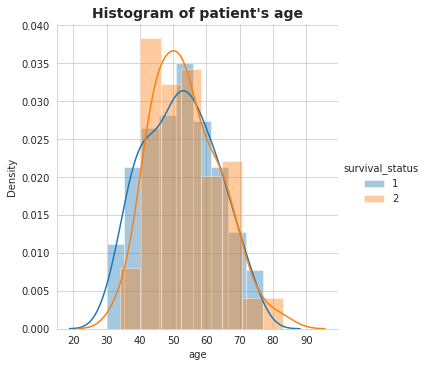

In [ ]:
# Here, we are using age feature to generate pdf()
# pdf(smoothed form of histogram)
# pdf basically shows, how many of points lies in some interva

sns.FacetGrid(Haberman, hue="survival_status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend()

plt.title("Histogram of patient's age", weight = 'bold', size = 14)
plt.ylabel("Density")
plt.show()

Observations:
age between 30- 35 are highly to survive

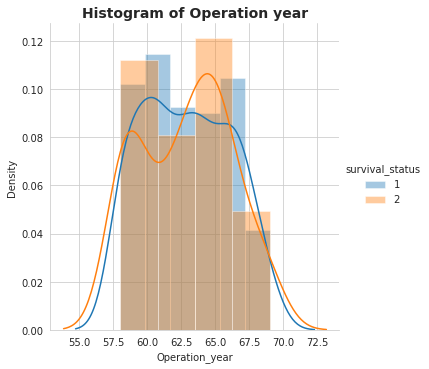

In [ ]:
sns.FacetGrid(Haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "operation_year") \
   .add_legend()

plt.title("Histogram of Operation year", weight ='bold', size = 14)
plt.xlabel('Operation_year')
plt.ylabel("Density")


plt.show()

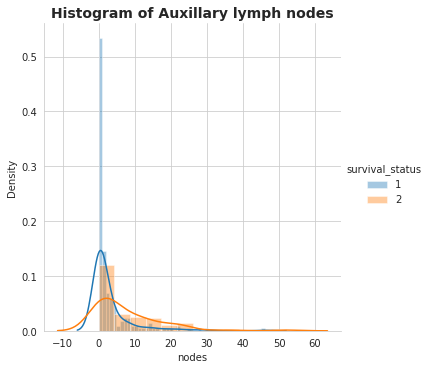

In [ ]:
sns.FacetGrid(Haberman, hue="survival_status", size=5) \
   .map(sns.distplot, "nodes") \
   .add_legend()

plt.title("Histogram of Auxillary lymph nodes", weight ='bold', size = 14)
plt.xlabel('nodes')
plt.ylabel("Density")



plt.show()



*  From above all the PDF plots, we can say that the features are overlapping to each other massively.
*   Probability, 58% of those with 0 to 5 axillary lymph nodes survived, and 12% died as well
*   The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
* Patient with Zero node are high likely to survive. And also, People who have less number of nodes are likely to survive.




## **CDF(Cummulative Distributed Function)**

The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.

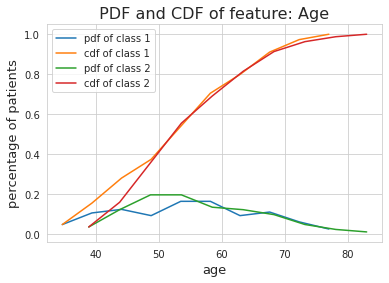

In [ ]:
#Haberman_1 = Haberman.loc[Haberman["survival_status"] == 1]
#Haberman_2 = Haberman.loc[Haberman["survival_status"] == 2]
# cdf gives you cummulative probability associated with a function
# Cumulative sum of area under curve upto gives you cdf
# Here, Class 1 means survived
# Class 2 means not survived

label = ["pdf of class 1", "cdf of class 1", "pdf of class 2", "cdf of class 2"]

counts, bin_edges = np.histogram(Haberman_1['age'], bins=10, density = True)
pdf_1 = counts/(sum(counts))
cdf_1 = np.cumsum(pdf_1)

plt.plot(bin_edges[1:],pdf_1)
plt.plot(bin_edges[1:], cdf_1)

counts, bin_edges = np.histogram(Haberman_2['age'], bins=10, density = True)
pdf_2 = counts/(sum(counts))
cdf_2 = np.cumsum(pdf_2)

plt.plot(bin_edges[1:],pdf_2)
plt.plot(bin_edges[1:], cdf_2)

plt.xlabel('age', size =13)
plt.ylabel('percentage of patients', size = 13)

plt.title(' PDF and CDF of feature: Age ', size = 16)
plt.legend(label)

plt.show()

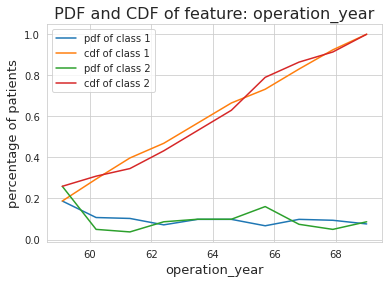

In [ ]:


counts, bin_edges = np.histogram(Haberman_1['operation_year'], bins=10, density = True)
pdf_1 = counts/(sum(counts))
cdf_1 = np.cumsum(pdf_1)

plt.plot(bin_edges[1:],pdf_1)
plt.plot(bin_edges[1:], cdf_1)

counts, bin_edges = np.histogram(Haberman_2['operation_year'], bins=10, density = True)
pdf_2 = counts/(sum(counts))
cdf_2 = np.cumsum(pdf_2)

plt.plot(bin_edges[1:],pdf_2)
plt.plot(bin_edges[1:], cdf_2)

plt.xlabel('operation_year', size =13)
plt.ylabel('percentage of patients', size = 13)

plt.title(' PDF and CDF of feature: operation_year ', size = 16)
plt.legend(label)

plt.show()



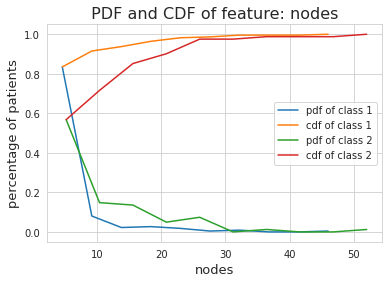

In [ ]:



counts, bin_edges = np.histogram(Haberman_1['nodes'], bins=10, density = True)
pdf_1 = counts/(sum(counts))
cdf_1 = np.cumsum(pdf_1)

plt.plot(bin_edges[1:],pdf_1)
plt.plot(bin_edges[1:], cdf_1)

counts, bin_edges = np.histogram(Haberman_2['nodes'], bins=10, density = True)
pdf_2 = counts/(sum(counts))
cdf_2 = np.cumsum(pdf_2)

plt.plot(bin_edges[1:],pdf_2)
plt.plot(bin_edges[1:], cdf_2)

plt.xlabel('nodes', size =13)
plt.ylabel('percentage of patients', size = 13)

plt.title(' PDF and CDF of feature: nodes ', size = 16)
plt.legend(label)

plt.show()


**observations**

*   15% of the patient's survived who age is less than or equal to 37
*   Patient's who has more than 46 nodes not survived
*   Almost 80% of the patients have less than or equal to 5 positive lymph nodea.





#** Box plot and Whiskers**

Box plot takes a less space and visually represents the five number summary of the data points in a box. 
The outliers are displayed as points outside the box.
1. Q1 - 1.5*IQR
2. Q1 (25th percentile)
3. Q2 (50th percentile or median)
4. Q3 (75th percentile)
5. Q3 + 1.5*IQR
Inter Quartile Range = Q3 -Q1

### Median, Percentile, Quantile, IQR, MAD

In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Haberman_1['age']))
print(np.median(Haberman_2['age']))



print("\nQuantiles:")
print(np.percentile(Haberman_1['age'],np.arange(0, 100, 25)))
print(np.percentile(Haberman_2['age'],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(Haberman_1['age'],90))
print(np.percentile(Haberman_2['age'],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_1['age']))
print(robust.mad(Haberman_2['age']))



Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Haberman_1['operation_year']))
print(np.median(Haberman_2['operation_year']))



print("\nQuantiles:")
print(np.percentile(Haberman_1['operation_year'],np.arange(0, 100, 25)))
print(np.percentile(Haberman_2['operation_year'],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(Haberman_1['operation_year'],90))
print(np.percentile(Haberman_2['operation_year'],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_1['operation_year']))
print(robust.mad(Haberman_2['operation_year']))


Medians:
63.0
63.0

Quantiles:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
4.447806655516806
4.447806655516806


In [ ]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(Haberman_1['nodes']))
print(np.median(Haberman_2['nodes']))



print("\nQuantiles:")
print(np.percentile(Haberman_1['nodes'],np.arange(0, 100, 25)))
print(np.percentile(Haberman_2['nodes'],np.arange(0, 100, 25)))


print("\n90th Percentiles:")
print(np.percentile(Haberman_1['nodes'],90))
print(np.percentile(Haberman_2['nodes'],90))


from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(Haberman_1['nodes']))
print(robust.mad(Haberman_2['nodes']))


Medians:
0.0
4.0

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles:
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


### **Box plot**

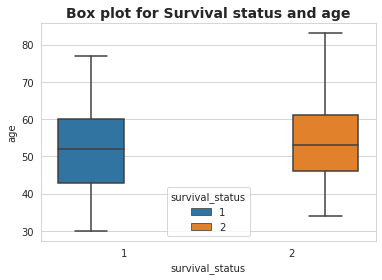

In [ ]:
# boxplot gives you the statistical summery of data
# Rectangle represent the 2nd and 3rd quartile (horizontal line either side of the rectangle)
# The horizontal line inside box represents median
# We can add title in box plot using either way
# plt.title("Box plot for survival_status and age") or set_title("")


sns.boxplot(x='survival_status',y='age', hue = "survival_status", data=Haberman)\
    .set_title('Box plot for Survival status and age', weight = 'bold', size = 14)
plt.show()

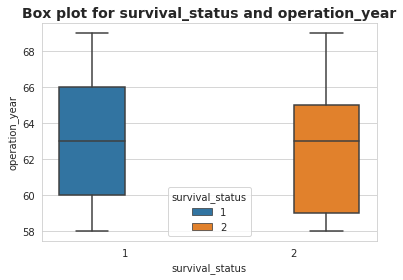

In [ ]:
sns.boxplot(x = "survival_status", y = "operation_year", hue = "survival_status", data = Haberman)\
  .set_title("Box plot for survival_status and operation_year",weight = 'bold', size = 14)

plt.show()

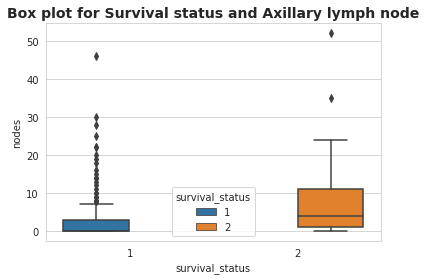

In [ ]:
sns.boxplot(x='survival_status',y='nodes', hue = "survival_status", data=Haberman)\
   .set_title("Box plot for Survival status and Axillary lymph node",weight = 'bold', size = 14)
plt.show()

# Violin plots

Violin plot is the combination of box plot and probability density function.

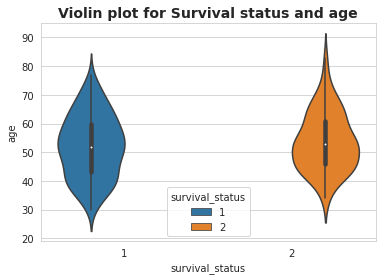

In [ ]:
# The violin plot shows the full distribution of the data.
# It is combination of box plot and histogram
# central dot represents median
sns.violinplot(x="survival_status", y="age", hue = "survival_status", data=Haberman, size=8)\
    .set_title("Violin plot for Survival status and age",weight = 'bold', size = 14)
plt.show()

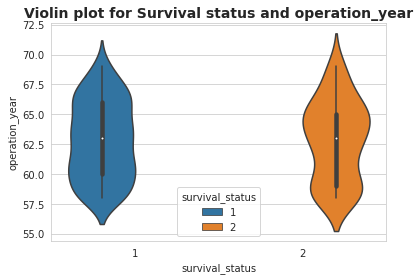

In [ ]:
sns.violinplot(x="survival_status", y="operation_year", hue = "survival_status", data=Haberman, size=8)\
    .set_title("Violin plot for Survival status and operation_year",weight = 'bold', size = 14)
plt.show()

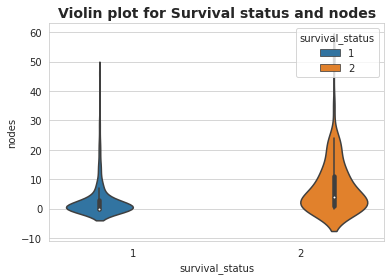

In [ ]:
sns.violinplot(x="survival_status", y="nodes", hue = "survival_status", data=Haberman, size=8)\
    .set_title("Violin plot for Survival status and nodes",weight = 'bold', size = 14)
plt.show()

**observations:**


*  From Box plot and Violin plot - Almost 80% of the patients have less than or equal to 5 positive lymph nodea.





## **Multivariate Probability density, contour plot**

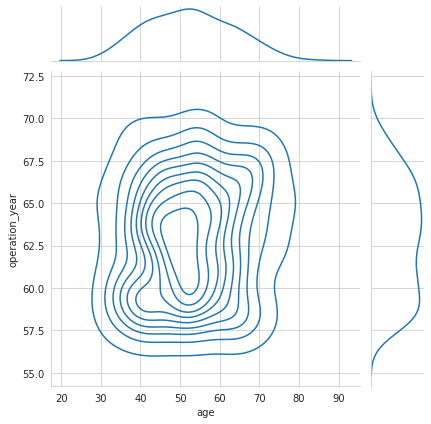

In [ ]:
sns.jointplot(x="age", y="operation_year", data=Haberman, kind="kde");
plt.show()

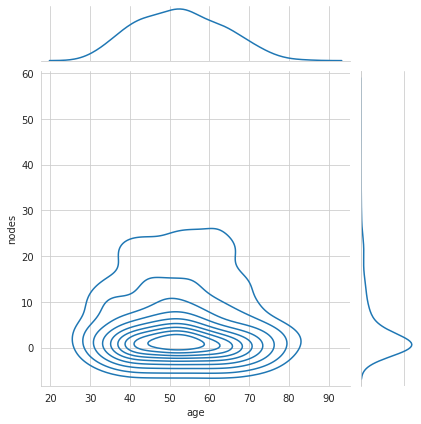

In [ ]:
sns.jointplot(x="age", y="nodes", data=Haberman, kind="kde")
plt.grid()
plt.show()

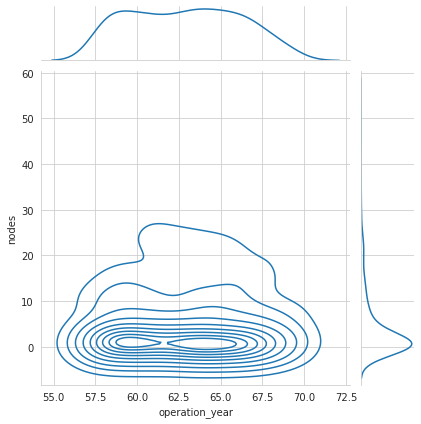

In [ ]:
sns.jointplot(x="operation_year", y="nodes", data=Haberman, kind="kde");
plt.show()

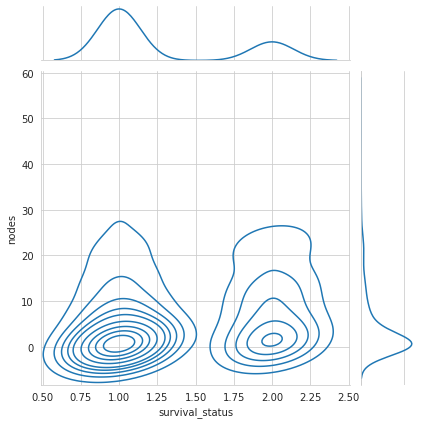

In [ ]:
#2D Density plot, contors-plot

sns.jointplot(x="survival_status", y="nodes", data=Haberman, kind="kde")
plt.grid()
plt.show()

**Observations:**
Patient with Zero node are high likely to survive. And also, People who have less number of nodes are likely to survive with age less than 40 yr age

## **Co-relation Matrix**

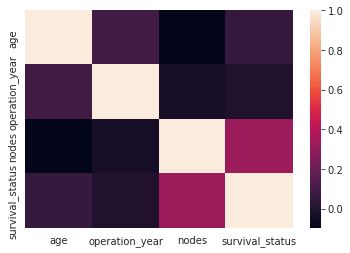

In [104]:
corr = Haberman.corr(method = 'spearman')
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

observations:
* As can be seen from the spearmann rank-correlation matrix, the most feature that has most correlation with the output survived_more_than_5_years is positive_auxiliary_nodes. The correlation is negative due to the fact that more number of positive auxiliary nodes refer that the patient belongs to the False class.

# **Overall Observations**


**From Data Preparation & Description:**

* From above dataset, we have four features(variables) - [age, operation_year, nodes, survival_status].
* age, operation_year,nodes are Independent variables.
* survival_status is Dependent variable (class label).
* There are no missing values in this dataset. So there is no need to do data imputation.
* Dataset is Imbalanced-datasets, becoz data is distrubuted as 73% in status'1' and 26% in status'2'
* 74% of patients has survived more than 5 yr and 26 % of survived less than 5 yr.

- Age of patients lies between 30 to 83

* 50% patients lie in between the age of (44,61)
* 95% patients lie in between the age of (32,72)
* There are a few Outlier in node dataset.
* 50% dataset have number of nodes lie between (0,4) who age lie between (44,61)
* 73 % patinets are lived less than 5 years






**From Scatter plots and Pair-plots:**


*   The given dataset is not linearly seprable form each class. There are too much overlapping in the data-points and hence it is very diffucult to classify.


*  we can not build simple model using only if else condition we need to have some more complex technique to handle this dataset.

* Many patients between the ages of 41 and 70 died.

* Many patients died who auxially lymphic ndoes was between (0,25)

*  We can apply 'if-else' condition to classify the model based on #nodes. eg: 0<= node <=25 belong to Survival status = 2 (dead)

* We can see that the patients both survived and died in the range of (0,5) lymph nodes. But, The died ratio is less than survive ratio 
 
* Most of them who survived more in the age between approx. (35,65) with zero nodes

-  75% of the patients affected less than 5 nodes and 25 % of them affected with nodes range (5,52)

* Patients with age > 77 were not able to survive.

* There are 90% of Patients, all of whom have Nodes <= 10

* node=0 has the highest Survival rate
* Operation year having range 63-66 had lowest survival rate.

* Patients with Age < 40 and nodes < 30 have higher chances of survival.
* Patients with Age > 50 and  nodes > 10 has less chances of survival.

**From PDF & CDF:**

* Many patients between the ages of 41 and 70 died.
* Most of them who survived more in the age between approx. (35,65) with zero nodes
* Age, Year and Nodes are overlappped to each other, almost linealry in-sepearable.
* from pair plot, We can apply 'if-else' condition to classify the model based on #nodes. eg: 0<= node <=25 belong to Survival status = 2 (dead)
* Many patients died who auxially lymphic ndoes was between (0,25)
* We can see that the patients both survived and died in the range of (0,5) lymph nodes. But, The died ratio is less than survive ratio

* age between 30- 35 are highly to survive
* Probability, 58% of those with 0 to 5 axillary lymph nodes survived, and 12% died as well
* The number of positive lymph nodes of the survivors is highly densed from 0 to 5.
* Patient with Zero node are high likely to survive. And also, People who have less number of nodes are likely to survive.

* 15% of the patient's survived who age is less than or equal to 37

* Patient's who has more than 46 nodes not survived
* Almost 80% of the patients have less than or equal to 5 positive lymph nodea.

* Age: The distribution of age is skewed towards the younger age group, with the majority of patients being younger than 40 years old.

* Year of surgery: The distribution of the year of surgery is relatively balanced, with an equal number of patients in each year.

* Positive axillary nodes: The majority of patients have 0-3 positive axillary nodes, with a small number of patients having more than 3 positive nodes.

* Survival: The survival rate is slightly higher for patients who had less than 5 positive axillary nodes, but there is still a significant number of patients who did not survive despite having fewer positive nodes.

* Age and survival: There is a slightly higher survival rate for younger patients, but the difference is not significant.

* Year of surgery and survival: There is no significant difference in the survival rate based on the year of surgery.



**From Box plot & Violin plot:**

* Almost 80% of the patients have less than or equal to 5 positive lymph nodea.



**Multivariate analysis (PD, countour plot)**

* Patient with Zero node are high likely to survive. And also, People who have less number of nodes are likely to survive with age less than 40 yr age




-<i> Age of the patients and Year are not enough to make a model for justifying survival status.

-<i> Patient with Zero node are high likely to survive. And also, People who have less number of nodes are likely to survive with age less than 40 yr age
-<i> age between 30- 35 are high likely to survive.

-----****-----*

* -<b> Overall, it appears that the number of nodes is a good predictor of survival, with patients who had fewer positive nodes having a higher survival rate. However, other factors such as age and other unknown factors may also influence the survival rate of breast cancer patients.
* -<b> Our Main obejctive is to figure out the Survival status based on the new Patient details.  But, It is difficult to predict data Because the Data is too imbalanced